Problem Statement : Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.
In this case study we will clean, sanitize and manipulate data to get useful and meaningful features out of the raw data given to us. We will use feature engineering to deal with the above functionalities we want to perform on the raw data given to us. This will help the data science team to build forecasting models on it

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from scipy.stats import ttest_ind # Numeric Vs categorical
from scipy.stats import ttest_1samp
from scipy.stats import ranksums
from sklearn import preprocessing

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
delhivery = pd.read_csv('C:/Prakruthi/DSML/Delhivery - Case study/delhivery_data.csv')

In [5]:
delhivery.shape

(144867, 24)

In [6]:
delhivery.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
print(delhivery['trip_uuid'].nunique())
print(delhivery['source_center'].nunique())
print(delhivery['destination_center'].nunique())
delhivery.groupby('route_type')['route_type'].value_counts().sort_values(ascending=False)

14817
1508
1481


route_type  route_type
FTL         FTL           99660
Carting     Carting       45207
Name: route_type, dtype: int64

In [8]:
delhivery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [9]:
delhivery.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

# Missing values treatment

In [10]:
delhivery.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [11]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [12]:
missing_df = missing_to_df(delhivery)
missing_df[missing_df['Total'] > 0]

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165


In [13]:
delhivery['source_name'] = delhivery['source_name'].fillna('Other')
delhivery['destination_name'] = delhivery['destination_name'].fillna('Other')

# Statistical Summary

In [14]:
delhivery[['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','factor','segment_actual_time','segment_osrm_time','segment_osrm_distance','segment_factor']].describe(include='all')

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


# Visual Analysis

C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'segment osrm distance')

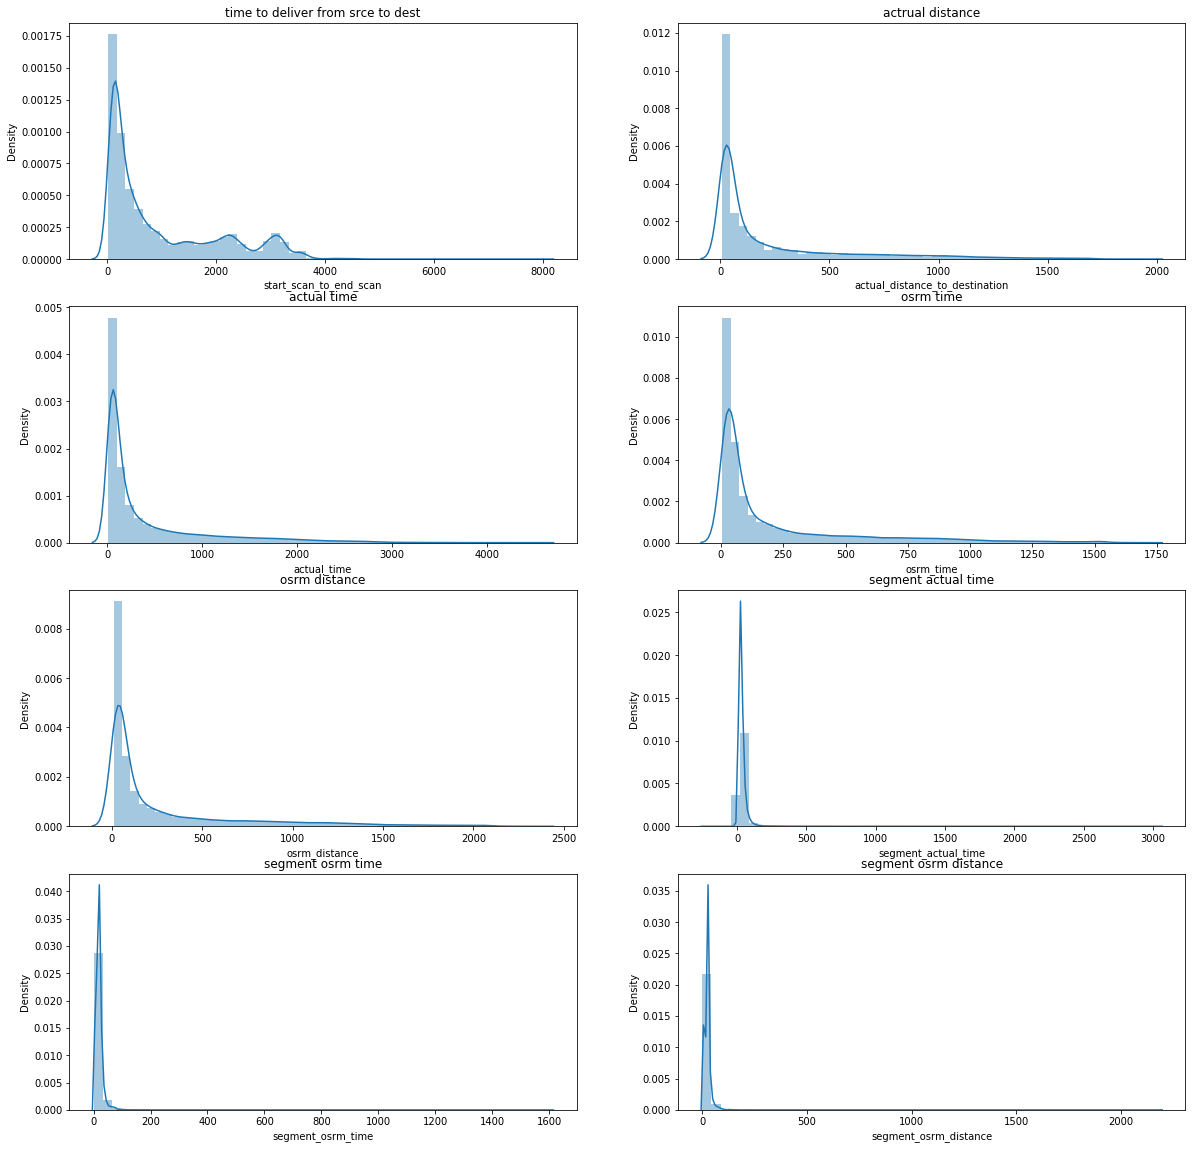

In [15]:
# Distribution plot for continous variable to visualize their distributions, outlier check etc
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
sns.distplot(delhivery['start_scan_to_end_scan'],ax=axis[0,0]).set_title('time to deliver from srce to dest')
sns.distplot(delhivery['actual_distance_to_destination'],ax=axis[0,1]).set_title('actrual distance')
sns.distplot(delhivery['actual_time'],ax=axis[1,0]).set_title('actual time')
sns.distplot(delhivery['osrm_time'],ax=axis[1,1]).set_title('osrm time')
sns.distplot(delhivery['osrm_distance'],ax=axis[2,0]).set_title('osrm distance')
sns.distplot(delhivery['segment_actual_time'],ax=axis[2,1]).set_title('segment actual time')
sns.distplot(delhivery['segment_osrm_time'],ax=axis[3,0]).set_title('segment osrm time')
sns.distplot(delhivery['segment_osrm_distance'],ax=axis[3,1]).set_title('segment osrm distance')

Text(0.5, 1.0, 'route type vs actual distance')

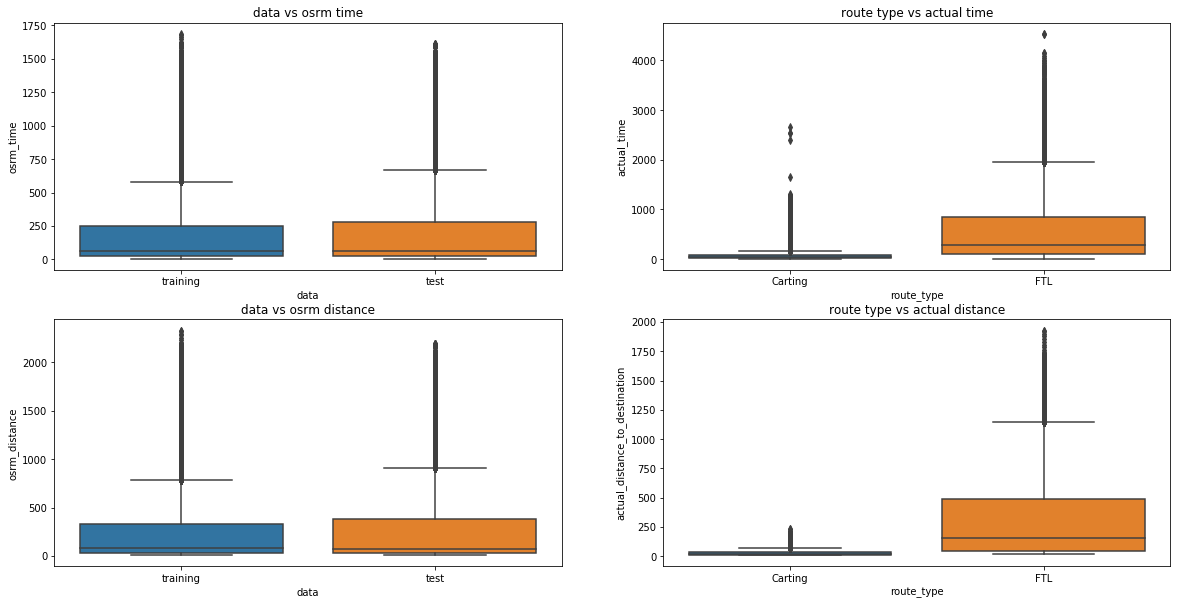

In [16]:
# Visual analysis using boxplots for categorical variables
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.boxplot(data=delhivery,x='data',y='osrm_time',ax=axis[0,0]).set_title('data vs osrm time')
sns.boxplot(data=delhivery,x='route_type',y='actual_time',ax=axis[0,1]).set_title('route type vs actual time')
sns.boxplot(data=delhivery,x='data',y='osrm_distance',ax=axis[1,0]).set_title('data vs osrm distance')
sns.boxplot(data=delhivery,x='route_type',y='actual_distance_to_destination',ax=axis[1,1]).set_title('route type vs actual distance')

# Merging of rows and aggregation of fields

In [17]:
#Grouping of sub-journey in the trip
delhivery['segment_key'] = delhivery['trip_uuid'] + delhivery['source_center'] + delhivery['destination_center']
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    delhivery[col + '_sum'] = delhivery.groupby('segment_key')[col].cumsum()
    
delhivery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320IND388620AABIND388320AAA,15.0,12.1171,11.0
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,21.2890,2.588235,28.0,6.0,9.1719,4.666667,trip-153741093647649320IND388620AABIND388320AAA,43.0,21.2890,17.0
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,35.8252,2.241379,21.0,11.0,14.5362,1.909091,trip-153741093647649320IND388620AABIND388320AAA,64.0,35.8252,28.0
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,47.1900,1.948718,10.0,10.0,11.3648,1.000000,trip-153741093647649320IND388620AABIND388320AAA,74.0,47.1900,38.0
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,53.2334,2.266667,26.0,6.0,6.0434,4.333333,trip-153741093647649320IND388620AABIND388320AAA,100.0,53.2334,44.0


In [18]:
segment_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last'
    
}

In [19]:
#Grouping by each mini trip
segment = delhivery.groupby('segment_key').agg(segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()

In [20]:
# Finding the trip duration by using the od start time and end time
segment['od_start_time'] = segment['od_start_time'].astype('datetime64')
segment['od_end_time'] = segment['od_end_time'].astype('datetime64')
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']) / pd.Timedelta(hours=1)
segment.drop(['od_start_time', 'od_end_time'], axis=1, inplace=True)

In [21]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,21.010074
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,16.658423
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,0.980540
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,2.046325
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,13.910649
5,5,trip-153671043369099517IND562132AAAIND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0,51.662060
6,6,trip-153671046011330457IND400072AABIND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,1.674916
7,7,trip-153671052974046625IND583101AAAIND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),152.0,59.530350,147.0,46.0,63.6461,147.0,63.6461,45.0,2.533549
8,8,trip-153671052974046625IND583119AAAIND583101AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),485.0,41.317614,131.0,44.0,53.5761,130.0,53.5761,44.0,8.096547
9,9,trip-153671052974046625IND583201AAAIND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),80.0,26.600536,63.0,27.0,29.5696,63.0,29.5697,26.0,1.342389


In [22]:
trip_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum'
    
}

In [23]:
trip = segment.groupby('segment_key').agg(trip_dict).reset_index(drop=True)

In [25]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,21.010074,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,16.658423,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,0.980540,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,2.046325,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),834.0,13.910649,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
5,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099.0,51.662060,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0
6,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,1.674916,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
7,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),152.0,2.533549,59.530350,147.0,46.0,63.6461,147.0,63.6461,45.0
8,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),485.0,8.096547,41.317614,131.0,44.0,53.5761,130.0,53.5761,44.0
9,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),80.0,1.342389,26.600536,63.0,27.0,29.5696,63.0,29.5697,26.0


# Feature Creation

In [42]:
#Splitting and extracting the source_name to get the city, place and code as separate features for further analysis

trip["source_city"] = ""
trip["source_place"] = ""
trip["source_code"] = ""
trip["source_state"] = ""
for i in range(len(trip['source_name'])):
    split_string = trip['source_name'][i].split("(")
    if len(split_string) > 1:
        split_state = split_string[1].split(")")
        trip["source_state"][i] = split_state[0]
    else:
        trip["source_state"][i] = ''
    split_string_2 = split_string[0].split("_")
    trip["source_city"][i] = split_string_2[0] 
    if len(split_string_2) == 2:
        trip['source_place'][i] = split_string_2[1]
        trip['source_code'][i] = ''
    if len(split_string_2) == 3:
        trip['source_place'][i] = split_string_2[1]
        trip['source_code'][i] = split_string_2[2]
    if len(split_string_2) == 4:
        trip['source_place'][i] = split_string_2[1]
        trip['source_code'][i] = split_string_2[2] + split_string_2[3]

C:\Users\sanke\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sanke\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\sanke\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sanke\Anaconda3\lib\site-packages\ipykernel

In [59]:
#Splitting and extracting the destination_name to get the city, place and code as separate features for further analysis

trip["destination_city"] = ""
trip["destination_place"] = ""
trip["destination_code"] = ""
trip["destination_state"] = ""
for i in range(len(trip['destination_name'])):
    split_string = trip['destination_name'][i].split("(")
    if len(split_string) > 1:
        split_state = split_string[1].split(")")
        trip["destination_state"][i] = split_state[0]
    else:
        trip["destination_state"][i] = ''
    split_string_2 = split_string[0].split("_")
    trip["destination_city"][i] = split_string_2[0] 
    if len(split_string_2) == 2:
        trip['destination_place'][i] = split_string_2[1]
        trip['destination_code'][i] = ''
    if len(split_string_2) == 3:
        trip['destination_place'][i] = split_string_2[1]
        trip['destination_code'][i] = split_string_2[2]
    if len(split_string_2) == 4:
        trip['destination_place'][i] = split_string_2[1]
        trip['destination_code'][i] = split_string_2[2] + split_string_2[3]

C:\Users\sanke\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sanke\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\sanke\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sanke\Anaconda3\lib\site-packages\ipykernel

In [60]:
# create a new column corridor to help draw business insights
trip['corridor'] = trip['source_city'] + '_' + trip['destination_city']

In [61]:
trip['trip_creation_year'] = pd.to_datetime(trip['trip_creation_time']).dt.year
trip['trip_creation_month'] = pd.to_datetime(trip['trip_creation_time']).dt.month
trip['trip_creation_day'] = pd.to_datetime(trip['trip_creation_time']).dt.day

In [62]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_code,source_state,destination_city,destination_place,destination_code,destination_state,corridor,trip_creation_year,trip_creation_month,trip_creation_day
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,...,H6,Uttar Pradesh,Gurgaon,Bilaspur,HB,Haryana,Kanpur_Gurgaon,2018,9,12
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,...,H,Madhya Pradesh,Kanpur,Central,H6,Uttar Pradesh,Bhopal_Kanpur,2018,9,12
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,...,D,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Doddablpur_Chikblapur,2018,9,12
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,...,I,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,Tumkur_Doddablpur,2018,9,12
4,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),834.0,...,HB,Haryana,Chandigarh,Mehmdpur,H,Punjab,Gurgaon_Chandigarh,2018,9,12
5,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099.0,...,H,Karnataka,Gurgaon,Bilaspur,HB,Haryana,Bangalore_Gurgaon,2018,9,12
6,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub _Mumbai,2018,9,12
7,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),152.0,...,,Karnataka,Hospet,,,Karnataka,Bellary_Hospet,2018,9,12
8,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),485.0,...,D,Karnataka,Bellary,Dc,,Karnataka,Sandur_Bellary,2018,9,12
9,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),80.0,...,,Karnataka,Sandur,WrdN1DPP,D,Karnataka,Hospet _Sandur,2018,9,12


# Comparison & Visualization of time and distance fields

In [63]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'source_city', 'source_place', 'source_code',
       'source_state', 'destination_city', 'destination_place',
       'destination_code', 'destination_state', 'corridor',
       'trip_creation_year', 'trip_creation_month', 'trip_creation_day'],
      dtype='object')

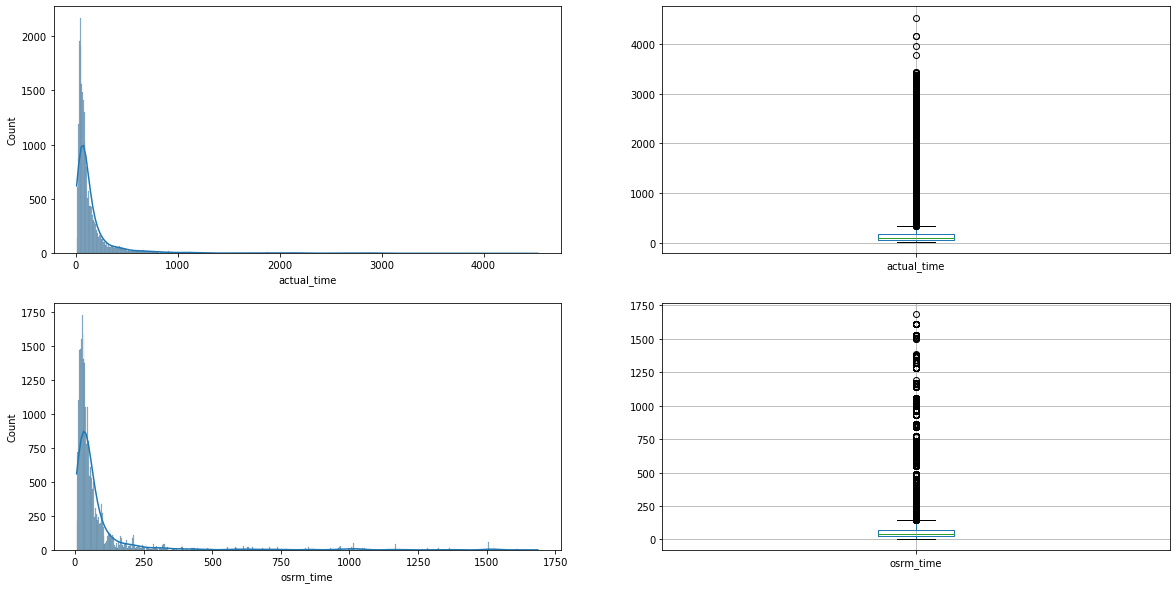

In [64]:
#comparing actual time with osrm time to see if they're different

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.histplot(trip["actual_time"], ax=axis[0,0], kde=True)
trip.boxplot(column='actual_time', ax=axis[0,1])                      

sns.histplot(trip["osrm_time"], ax=axis[1,0], kde=True)
trip.boxplot(column='osrm_time', ax=axis[1,1])  

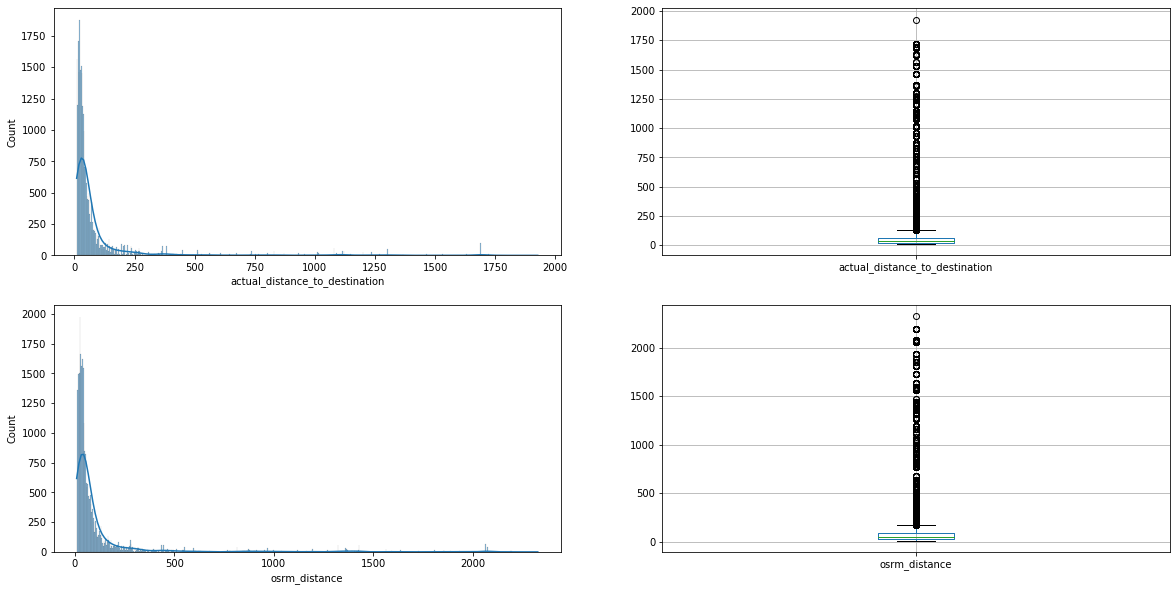

In [65]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.histplot(trip["actual_distance_to_destination"], ax=axis[0,0], kde=True)
trip.boxplot(column='actual_distance_to_destination', ax=axis[0,1])                      

sns.histplot(trip["osrm_distance"], ax=axis[1,0], kde=True)
trip.boxplot(column='osrm_distance', ax=axis[1,1])  

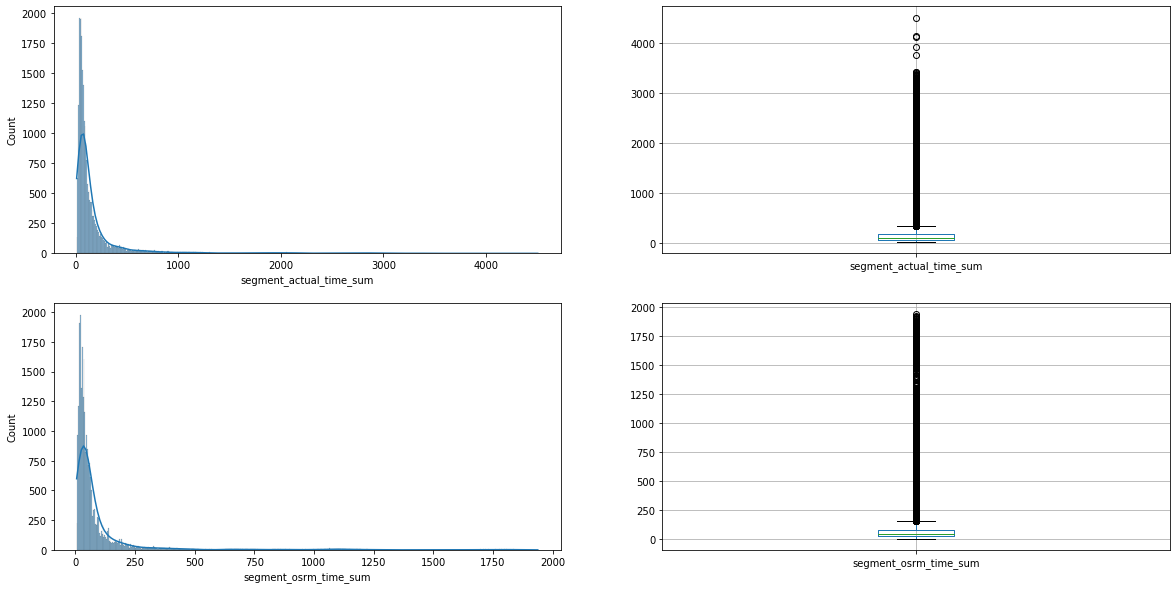

In [66]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.histplot(trip["segment_actual_time_sum"], ax=axis[0,0], kde=True)
trip.boxplot(column='segment_actual_time_sum', ax=axis[0,1])                      

sns.histplot(trip["segment_osrm_time_sum"], ax=axis[1,0], kde=True)
trip.boxplot(column='segment_osrm_time_sum', ax=axis[1,1])  

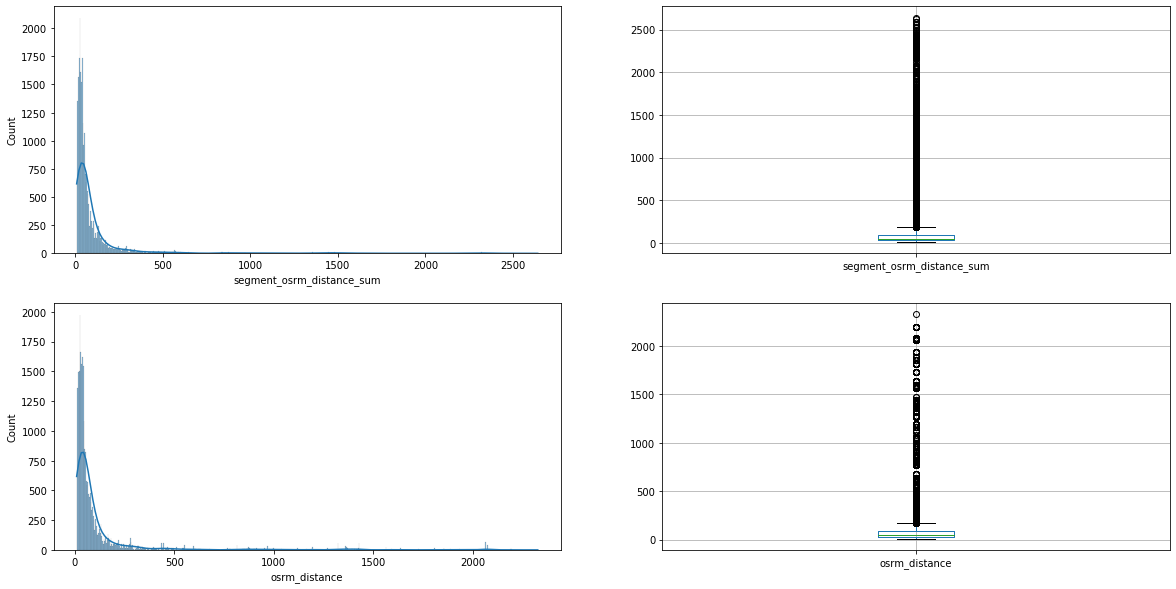

In [67]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.histplot(trip["segment_osrm_distance_sum"], ax=axis[0,0], kde=True)
trip.boxplot(column='segment_osrm_distance_sum', ax=axis[0,1])                      

sns.histplot(trip["osrm_distance"], ax=axis[1,0], kde=True)
trip.boxplot(column='osrm_distance', ax=axis[1,1]) 

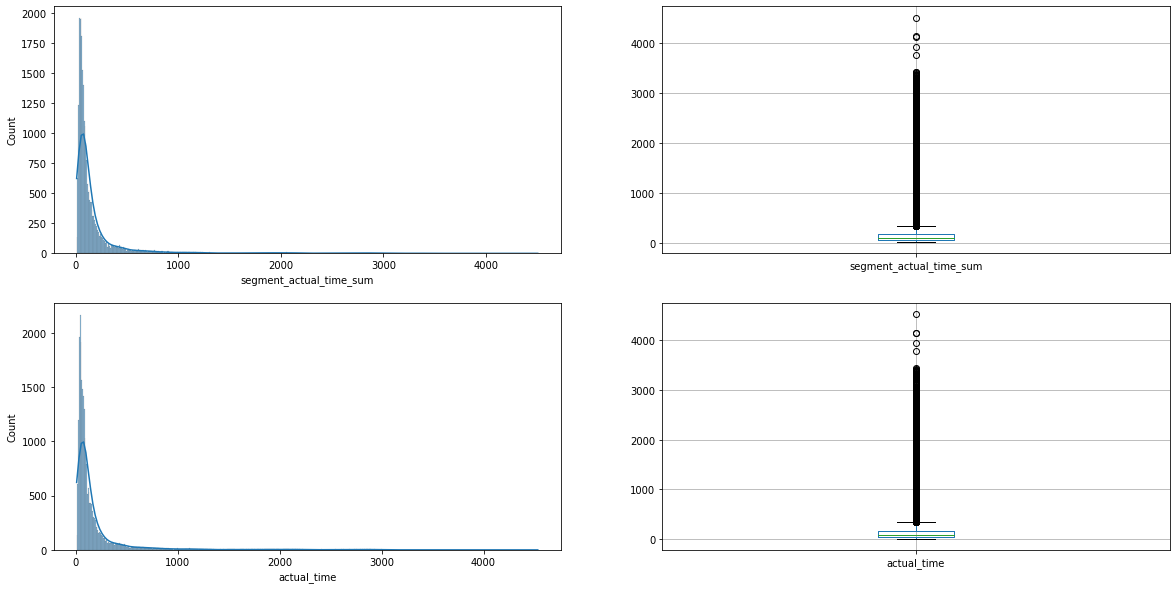

In [68]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.histplot(trip["segment_actual_time_sum"], ax=axis[0,0], kde=True)
trip.boxplot(column='segment_actual_time_sum', ax=axis[0,1])                      

sns.histplot(trip["actual_time"], ax=axis[1,0], kde=True)
trip.boxplot(column='actual_time', ax=axis[1,1]) 

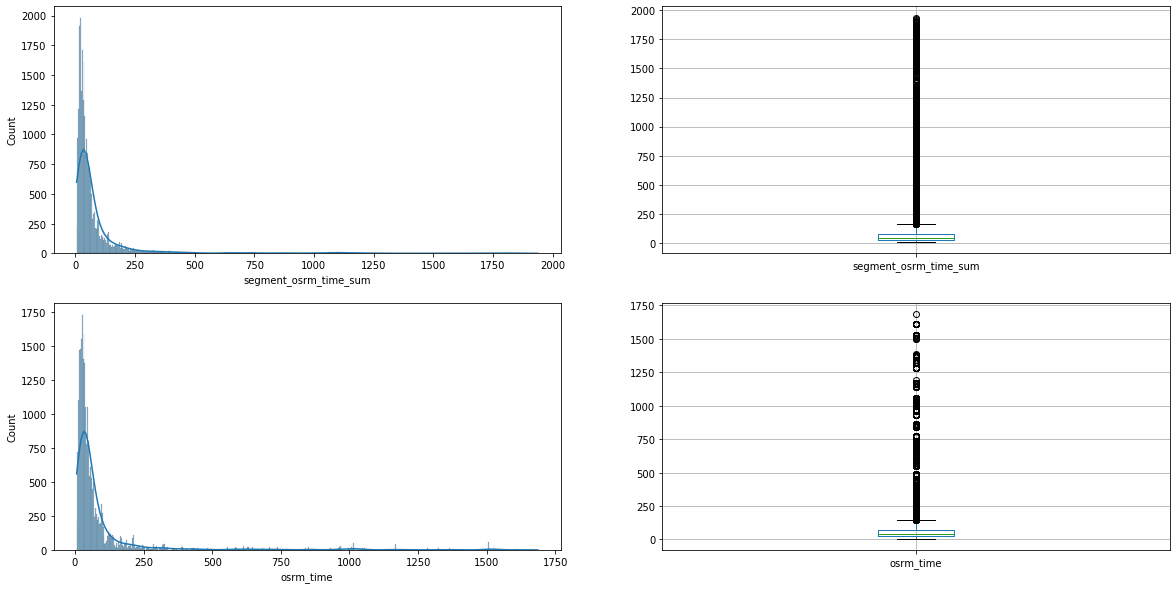

In [69]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.histplot(trip["segment_osrm_time_sum"], ax=axis[0,0], kde=True)
trip.boxplot(column='segment_osrm_time_sum', ax=axis[0,1])                      

sns.histplot(trip["osrm_time"], ax=axis[1,0], kde=True)
trip.boxplot(column='osrm_time', ax=axis[1,1]) 

# Outliers treatment

In [70]:
# We will be using the IQR method to treat the outliers. Using the IQR methos, we will be replacing the outlier values 
#with mean of the respective columns
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
    return df


In [71]:
trip['actual_distance_to_destination'] = impute_outliers_IQR(trip['actual_distance_to_destination'])

In [72]:
trip['actual_time'] = impute_outliers_IQR(trip['actual_time'])

In [73]:
trip['osrm_time'] = impute_outliers_IQR(trip['osrm_time'])

In [74]:
trip['osrm_distance'] = impute_outliers_IQR(trip['osrm_distance'])

In [75]:
trip['segment_actual_time_sum'] = impute_outliers_IQR(trip['segment_actual_time_sum'])

In [76]:
trip['segment_osrm_distance_sum'] = impute_outliers_IQR(trip['segment_osrm_distance_sum'])

In [77]:
trip['segment_osrm_time_sum'] = impute_outliers_IQR(trip['segment_osrm_time_sum'])

# Checking relationship between aggregated fields

In [78]:
# hypothesis testing between actual_time aggregated value and OSRM time aggregated value

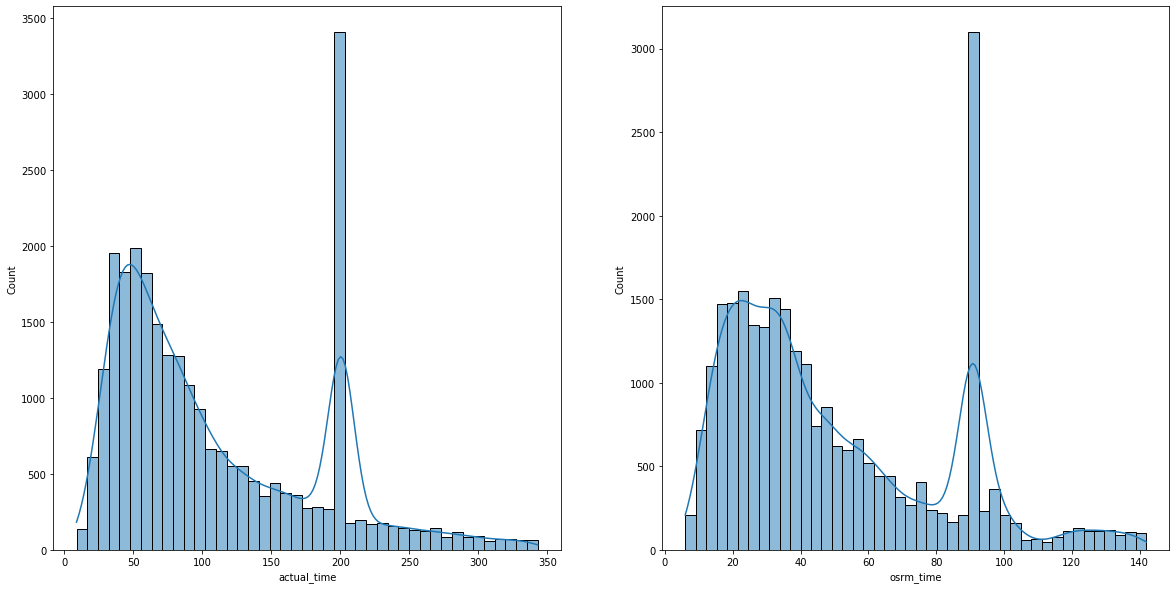

In [79]:
fig, axis = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(trip["actual_time"], ax=axis[0], kde=True)
sns.histplot(trip["osrm_time"], ax=axis[1], kde=True)                    


In [80]:
# H0 : aggregated actual time is same as aggregated osrm time
# Ha : aggregated actual time is more than the aggregated osrm time
alpha = 0.05 #testing at 95% confidence
test_stat , p_value = ranksums(trip['actual_time'], trip['osrm_time'],alternative='greater')
print("test statistic:",test_stat)
print("p value :",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

test statistic: 109.89729905559884
p value : 0.0
Reject H0


In [81]:
# Hypothesis testing between actual time aggregated value and segment actual time aggregated value

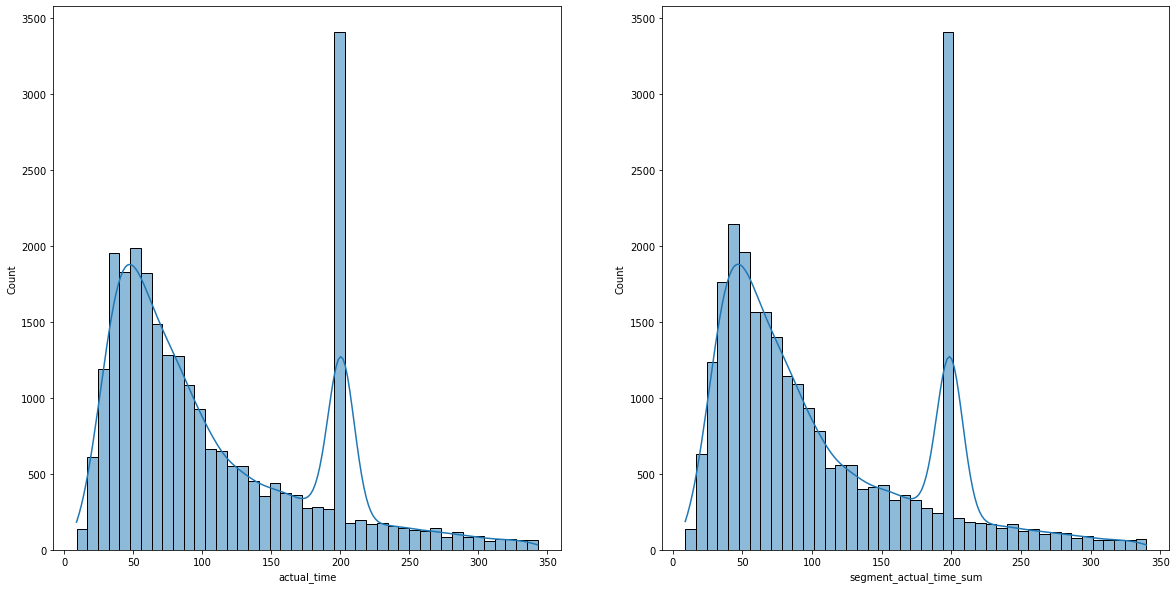

In [82]:
fig, axis = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(trip["actual_time"], ax=axis[0], kde=True)  
sns.histplot(trip["segment_actual_time_sum"], ax=axis[1], kde=True)

In [83]:
# H0 : aggregated actual time is same as aggregated segment actual time
# Ha : aggregated actual time is more than the aggregated segment actual time
alpha = 0.05 #testing at 95% confidence
test_stat , p_value = ranksums(trip['actual_time'], trip['segment_actual_time_sum'],alternative='greater')
print("test statistic:",test_stat)
print("p value :",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

test statistic: 4.408578057488138
p value : 5.20257593791673e-06
Reject H0


In [84]:
# Hypothesis testing between osrm distance aggregated value and segment osrm distance aggregated value

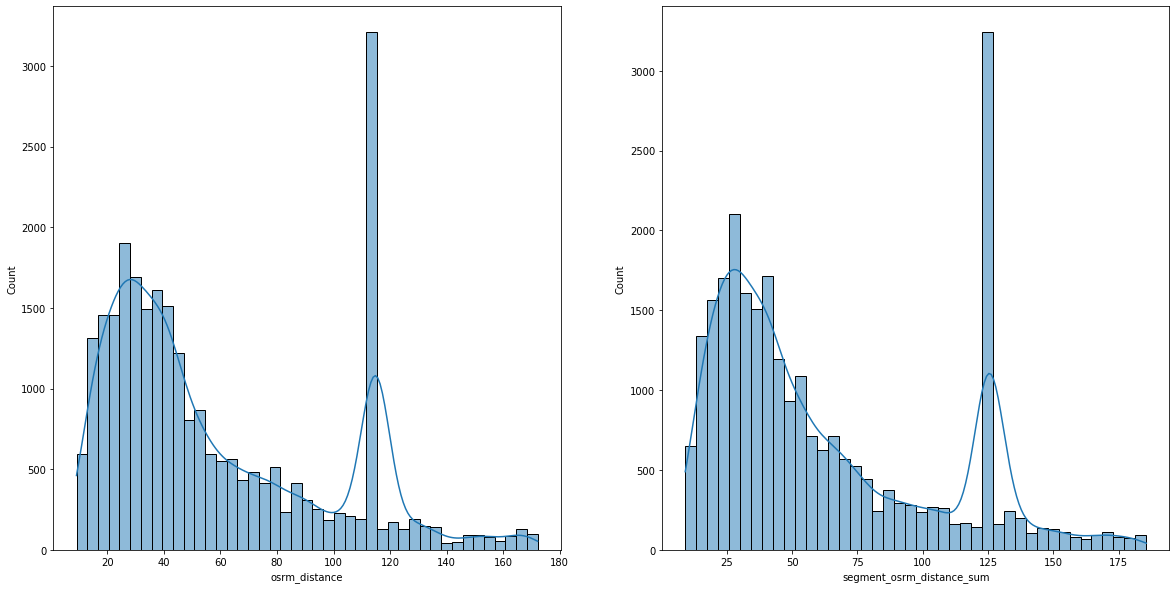

In [85]:
fig, axis = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(trip["osrm_distance"], ax=axis[0], kde=True)
sns.histplot(trip["segment_osrm_distance_sum"], ax=axis[1], kde=True)


In [86]:
# H0 : aggregated segment osrm distance is same as aggregated osrm distance
# Ha : aggregated segment osrm distance is more than the aggregated osrm distance
alpha = 0.05 #testing at 95% confidence
test_stat , p_value = ranksums(trip['segment_osrm_distance_sum'],trip['osrm_distance'],alternative='greater')
print("test statistic:",test_stat)
print("p value :",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

test statistic: 10.276208900025038
p value : 4.510316896570302e-25
Reject H0


In [87]:
# Hypothesis testing between osrm time aggregated value and segment osrm time aggregated value

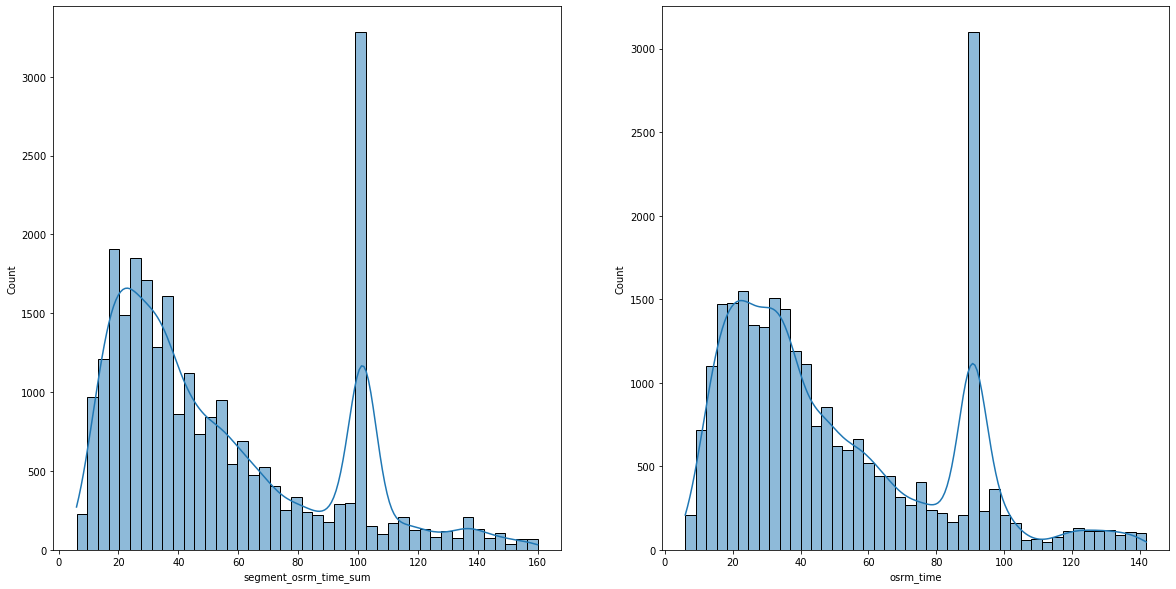

In [88]:
fig, axis = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(trip["segment_osrm_time_sum"], ax=axis[0], kde=True)
sns.histplot(trip["osrm_time"], ax=axis[1], kde=True)                    

In [89]:
# H0 : aggregated segment osrm time is same as aggregated osrm time
# Ha : aggregated segment osrm time is more than the aggregated osrm time
alpha = 0.05 #testing at 95% confidence
test_stat , p_value = ranksums(trip['segment_osrm_time_sum'],trip['osrm_time'],alternative='greater')
print("test statistic:",test_stat)
print("p value :",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

test statistic: 11.212478501454225
p value : 1.7706786165328236e-29
Reject H0


In [90]:
# Hypothesis testing to Compare the difference between Point a. and start_scan_to_end_scan

In [91]:
#Compare the difference between Point a. and start_scan_to_end_scan. We can use the 1 sample t test for hypothesis testing
# H0 : the average actual time taken to deliver is the same as osrm time
# Ha : the average actual time taken to deliver is more than the osrm time
alpha = 0.05 #testing at 95% confidence
point_a = np.mean(trip['osrm_time'])
test_stat , p_value = ttest_1samp(trip['start_scan_to_end_scan'], popmean=point_a)
print("test statistic:",test_stat)
print("p value :",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

test statistic: 91.73431091314349
p value : 0.0
Reject H0


# Handling categorical values 

In [92]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(trip[['route_type']]).toarray())

C:\Users\sanke\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
C:\Users\sanke\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more de

In [93]:
trip = trip.join(encoder_df)
trip.drop('route_type', axis=1, inplace=True)
trip.drop(0, axis=1, inplace=True)
trip.rename(columns = {1:'route_type'}, inplace = True)
trip

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,...,source_state,destination_city,destination_place,destination_code,destination_state,corridor,trip_creation_year,trip_creation_month,trip_creation_day,route_type
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,21.010074,...,Uttar Pradesh,Gurgaon,Bilaspur,HB,Haryana,Kanpur_Gurgaon,2018,9,12,1.0
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,16.658423,...,Madhya Pradesh,Kanpur,Central,H6,Uttar Pradesh,Bhopal_Kanpur,2018,9,12,1.0
2,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,0.980540,...,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Doddablpur_Chikblapur,2018,9,12,0.0
3,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,2.046325,...,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,Tumkur_Doddablpur,2018,9,12,0.0
4,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),834.0,13.910649,...,Haryana,Chandigarh,Mehmdpur,H,Punjab,Gurgaon_Chandigarh,2018,9,12,1.0
5,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099.0,51.662060,...,Karnataka,Gurgaon,Bilaspur,HB,Haryana,Bangalore_Gurgaon,2018,9,12,1.0
6,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,1.674916,...,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub _Mumbai,2018,9,12,0.0
7,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),152.0,2.533549,...,Karnataka,Hospet,,,Karnataka,Bellary_Hospet,2018,9,12,1.0
8,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),485.0,8.096547,...,Karnataka,Bellary,Dc,,Karnataka,Sandur_Bellary,2018,9,12,1.0
9,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),80.0,1.342389,...,Karnataka,Sandur,WrdN1DPP,D,Karnataka,Hospet _Sandur,2018,9,12,1.0


In [94]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(trip[['data']]).toarray())

C:\Users\sanke\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
C:\Users\sanke\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more de

In [95]:
trip = trip.join(encoder_df)
trip.drop('data', axis=1, inplace=True)
trip.drop(0, axis=1, inplace=True)
trip.rename(columns = {1:'data'}, inplace = True)
trip

,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,...,destination_city,destination_place,destination_code,destination_state,corridor,trip_creation_year,trip_creation_month,trip_creation_day,route_type,data
0,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260.0,21.010074,92.425217,...,Gurgaon,Bilaspur,HB,Haryana,Kanpur_Gurgaon,2018,9,12,1.0,1.0
1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,16.658423,92.425217,...,Kanpur,Central,H6,Uttar Pradesh,Bhopal_Kanpur,2018,9,12,1.0,1.0
2,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58.0,0.980540,24.644021,...,Chikblapur,ShntiSgr,D,Karnataka,Doddablpur_Chikblapur,2018,9,12,0.0,1.0
3,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122.0,2.046325,48.542890,...,Doddablpur,ChikaDPP,D,Karnataka,Tumkur_Doddablpur,2018,9,12,0.0,1.0
4,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),834.0,13.910649,92.425217,...,Chandigarh,Mehmdpur,H,Punjab,Gurgaon_Chandigarh,2018,9,12,1.0,1.0
5,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099.0,51.662060,92.425217,...,Gurgaon,Bilaspur,HB,Haryana,Bangalore_Gurgaon,2018,9,12,1.0,1.0
6,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,1.674916,17.175274,...,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub _Mumbai,2018,9,12,0.0,1.0
7,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),152.0,2.533549,59.530350,...,Hospet,,,Karnataka,Bellary_Hospet,2018,9,12,1.0,1.0
8,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),485.0,8.096547,41.317614,...,Bellary,Dc,,Karnataka,Sandur_Bellary,2018,9,12,1.0,1.0
9,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),80.0,1.342389,26.600536,...,Sandur,WrdN1DPP,D,Karnataka,Hospet _Sandur,2018,9,12,1.0,1.0


# Column Normalization /Column Standardization

In [96]:
trip.dtypes

trip_creation_time                 object
route_schedule_uuid                object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
start_scan_to_end_scan            float64
od_time_diff_hour                 float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time_sum           float64
segment_osrm_distance_sum         float64
segment_osrm_time_sum             float64
source_city                        object
source_place                       object
source_code                        object
source_state                       object
destination_city                   object
destination_place                  object
destination_code                   object
destination_state                 

In [97]:
trip1 = trip[['start_scan_to_end_scan','od_time_diff_hour','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum']]
scaler = preprocessing.MinMaxScaler()
names = trip1.columns
d = scaler.fit_transform(trip1)
scaled_df = pd.DataFrame(d, columns=names)
trip[['start_scan_to_end_scan','od_time_diff_hour','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum']] = scaled_df[['start_scan_to_end_scan','od_time_diff_hour','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum']]
trip.head()

,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,...,destination_city,destination_place,destination_code,destination_state,corridor,trip_creation_year,trip_creation_month,trip_creation_day,route_type,data
0,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),0.157400,0.157391,0.679328,...,Gurgaon,Bilaspur,HB,Haryana,Kanpur_Gurgaon,2018,9,12,1.0,1.0
1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),0.124270,0.124247,0.679328,...,Kanpur,Central,H6,Uttar Pradesh,Bhopal_Kanpur,2018,9,12,1.0,1.0
2,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),0.004824,0.004840,0.127380,...,Chikblapur,ShntiSgr,D,Karnataka,Doddablpur_Chikblapur,2018,9,12,0.0,1.0
3,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),0.012947,0.012957,0.321990,...,Doddablpur,ChikaDPP,D,Karnataka,Tumkur_Doddablpur,2018,9,12,0.0,1.0
4,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),0.103326,0.103320,0.679328,...,Chandigarh,Mehmdpur,H,Punjab,Gurgaon_Chandigarh,2018,9,12,1.0,1.0


# Business insights

In [98]:
# Checking from which State most orders are coming from
trip['source_state'].value_counts().sort_values(ascending=False).head(1)

Maharashtra    3565
Name: source_state, dtype: int64

In [99]:
#Checking to which state most orders are going to
trip['destination_state'].value_counts().sort_values(ascending=False).head(1)

Karnataka    3505
Name: destination_state, dtype: int64

In [100]:
# Checking from which city most orders are coming from
trip['source_city'].value_counts().sort_values(ascending=False).head(1)

Gurgaon    1141
Name: source_city, dtype: int64

In [101]:
# Checking to which city most orders are going to
trip['destination_city'].value_counts().sort_values(ascending=False).head(1)

Bengaluru    1180
Name: destination_city, dtype: int64

In [102]:
# Checking which is the busiest corridor 
trip['corridor'].value_counts().sort_values(ascending=False).head(1)

Bengaluru_Bengaluru    565
Name: corridor, dtype: int64

In [109]:
trip2 = trip
trip2[['start_scan_to_end_scan','od_time_diff_hour','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum']] = trip1[['start_scan_to_end_scan','od_time_diff_hour','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum']]

In [118]:
# Checking the average time taken between the busiest corridor
df_corridor = trip2.loc[trip2["corridor"] == 'Bengaluru_Bengaluru']
df_corridor["actual_time"].mean()

79.2778761061947

In [119]:
# Checking the average distance between the busiest corridor
df_corridor_distance = trip2.loc[trip2["corridor"] == 'Bengaluru_Bengaluru']
df_corridor_distance["actual_distance_to_destination"].mean()

29.075026481569214

In [122]:
# Checking which month had the highest no. of trips
trip['trip_creation_month'].value_counts().sort_values(ascending=False).head()

9     23159
10     3209
Name: trip_creation_month, dtype: int64

In [124]:
# Checking which month had the highest no. of trips
trip['trip_creation_day'].value_counts().sort_values(ascending=False)

18    1373
21    1361
25    1330
20    1322
13    1320
14    1296
15    1293
17    1293
12    1290
22    1280
26    1274
24    1177
27    1169
19    1155
3     1128
16    1098
23    1085
28    1078
1     1050
29    1034
2     1031
30     931
Name: trip_creation_day, dtype: int64